In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df=pd.read_csv('Data/Crop_recommendation.csv')

In [35]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [37]:
df.shape

(2200, 8)

In [38]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [39]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [40]:
df['label']=df['label'].map({'rice':0, 'maize':1, 'chickpea':2, 'kidneybeans':3, 'pigeonpeas':4,
       'mothbeans':5, 'mungbean':6, 'blackgram':7, 'lentil':8, 'pomegranate':9,
       'banana':10, 'mango':11, 'grapes':12, 'watermelon':13, 'muskmelon':14, 'apple':15,
       'orange':16, 'papaya':17, 'coconut':18, 'cotton':19, 'jute':20, 'coffee':21})

In [41]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0


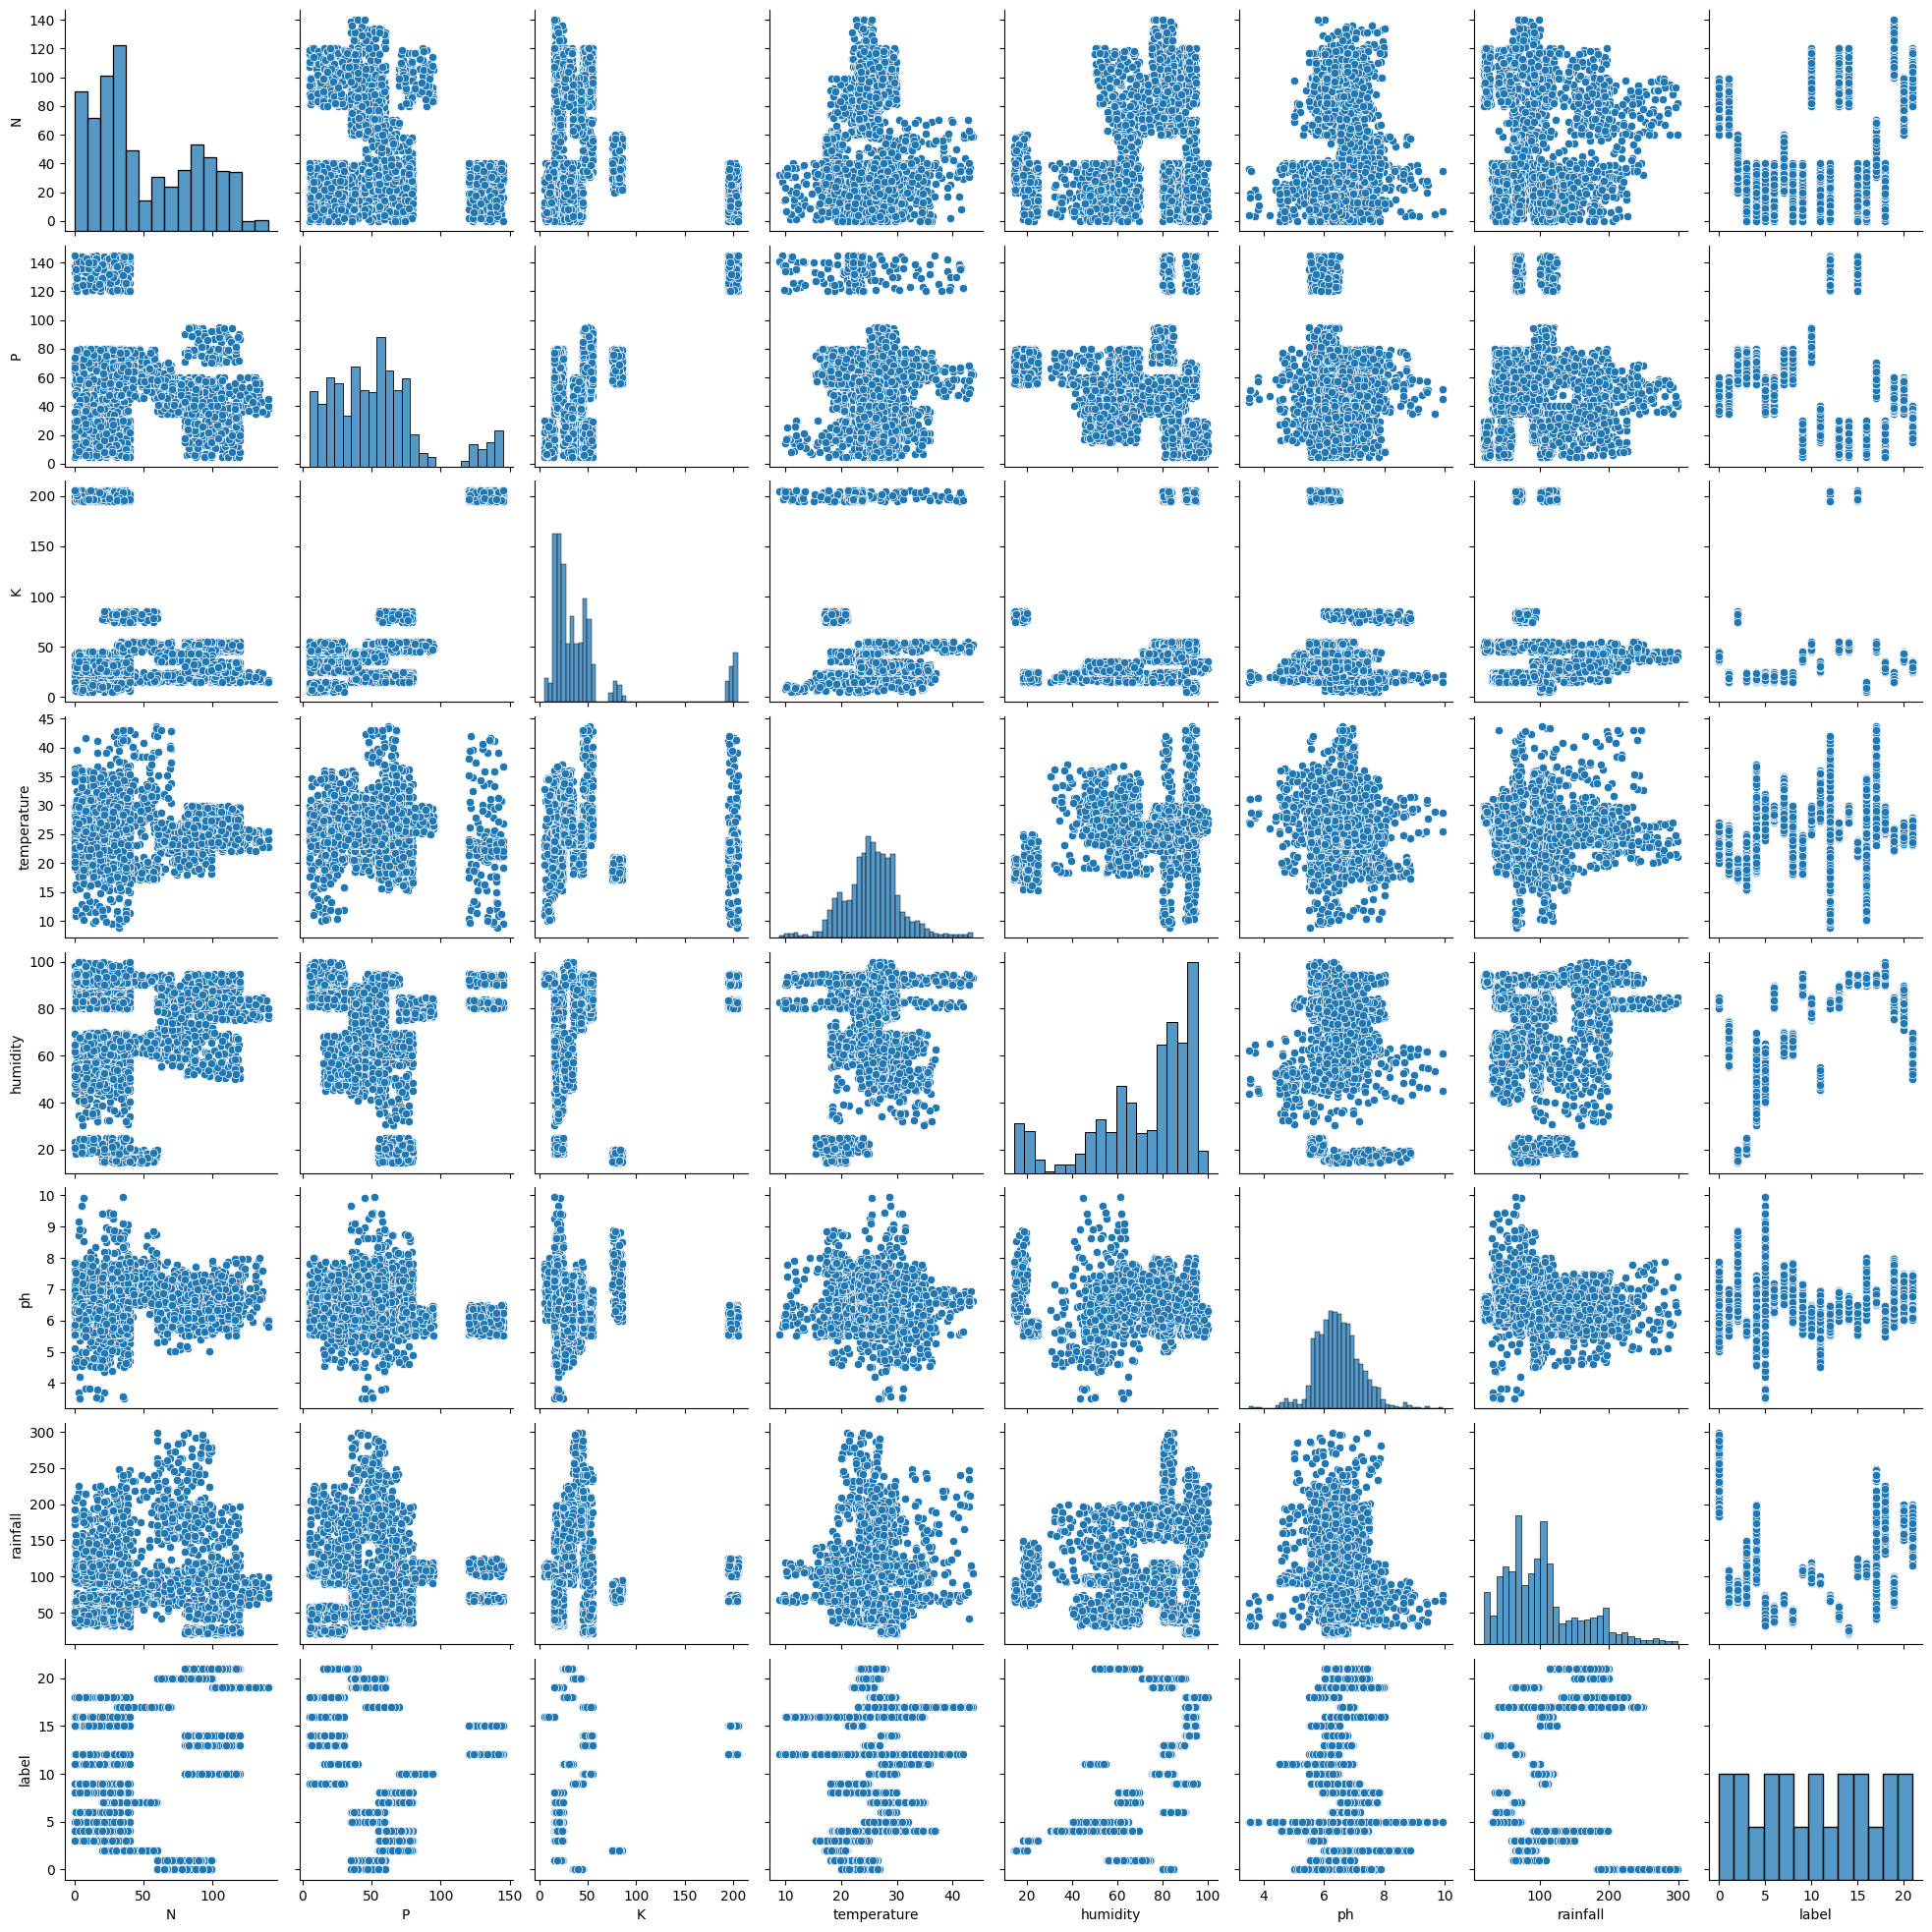

In [42]:
sns.pairplot(df)

<Axes: xlabel='label', ylabel='ph'>

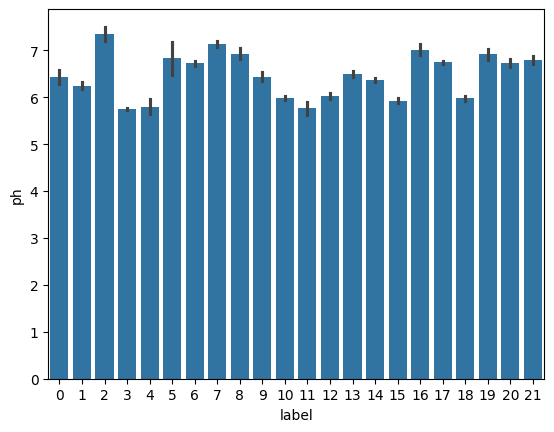

In [43]:
sns.barplot(df,x='label',y='ph')

<Axes: xlabel='temperature', ylabel='ph'>

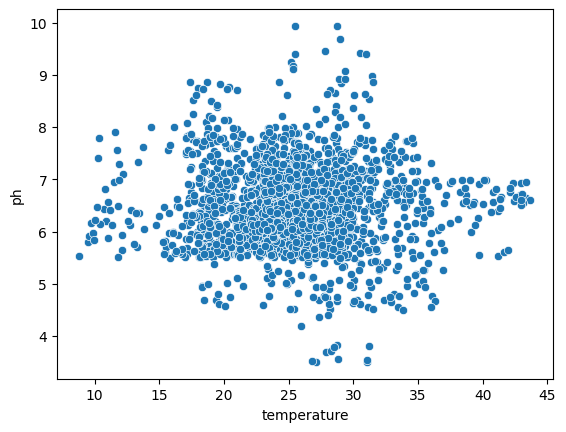

In [44]:
sns.scatterplot(df,x='temperature',y='ph')

In [45]:
X=df.iloc[:,:7]
y=df['label']

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [47]:
X_train.shape

(1650, 7)

In [54]:
from sklearn.preprocessing import StandardScaler
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [55]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [56]:
y_pred=classifier.predict(X_test)

In [57]:
print(y_pred)

[14 13 17 17 15 11 15  5  6  8  7 18  9 20 18  9 15  1 17 14 21 17 16 17
  2 20  6 16  4  0  9  5 20  8 20  7 20  2  2  3 17 11  8  1  6  1  4 18
 14  1  7 21 12  6 21  3 19 15 10  8 13 18  8 16 17  5 16  0 14  4 14 18
 20 10  7 17 10 19 13 16 21  2  0  5 16 11 21  5  7  9  1  5 19 17  4  5
  3 21  8  8 18  0 16 14 13  3 13 10  4  5 10 20 19  9  4  2  1 18  9  0
  4 12  7 18  2  7 18  1 10  5 10  3  9  2 18 16  4 10 10 15  3 14  6  5
 18 19 15 18  3  5  6  8 13  6  4  4  4  3  1 20  2 15 16 19  0 18 12  8
 13 12 12  7  9  2 18  1  8 12 13 20 21 21  3 20  5  3 10  3 18 17 17  6
 11  9 13  3  1 15  7  2 12 12 10 19  0  9  6 10 20  6  1  2  2  2 15  0
  3 17 21  7  3 11 11 18 17 15  2  9  2 14 15 14 14 11 11 19 18  9  0 14
 21 17  5  1 11 14  4  6 21 12 18 19  4  0 15  9 21  2 19 20 11 10 17 15
  2  0  4  5  6 20  9 12  5 20  1 18  1  2 10 20 18 21 11 14 15 10  4  7
 16  2 13 10 15  2 21  4 16 15 18 17 13  5 17  2  9  2 17  8 15  9  2 11
  2  9 13  3  6 14 13  3 14 11 20  7  2 10  7  4 17

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [59]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.98


In [61]:
import pickle
# Save the model
with open('Data/my_model.pkl', 'wb') as f:
    pickle.dump(classifier, f)